In [2]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [3]:
#import the dataset and visualize the dataset
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: xlabel='Class', ylabel='count'>

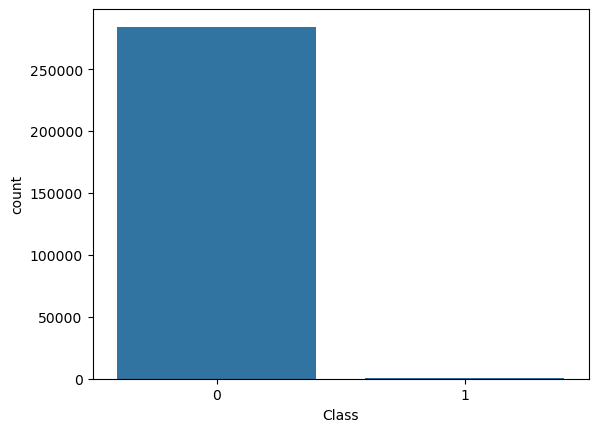

In [4]:
#visualize the target class 'Class'
sns.countplot(x='Class', data=dataset)

In [5]:
#seperating positive and negative classes
positiveDataset = dataset.loc[dataset['Class'] == 1]
negativeDataset = dataset.loc[dataset['Class'] == 0]

In [6]:
#creating training and testing set with negative class split 1:1 and positive class split 4:1, also keeping random_state constant so that all splits are same
positiveTrain, positiveTest = tts(positiveDataset, test_size=0.2, random_state=21)
negativeTrain, negativeTest = tts(negativeDataset, test_size=0.5)
trainDataset = positiveTrain.append(negativeTrain)
testDataset = positiveTest.append(negativeTest)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18244\3360441513.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainDataset = positiveTrain.append(negativeTrain)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18244\3360441513.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testDataset = positiveTest.append(negativeTest)


In [7]:
#create Regression object and scale the dataset
classifier = GaussianNB()
yTrain = trainDataset['Class']
yTest = testDataset['Class']
xTrain = trainDataset.drop(columns=['Class'])
xTest = testDataset.drop(columns=['Class'])
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [8]:
#fit the dataset to the train values
classifier.fit(xTrain, yTrain)

GaussianNB()

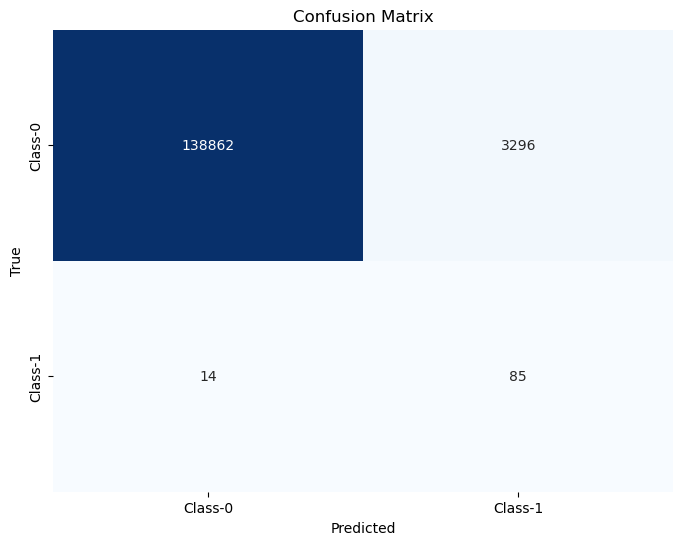

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(yTest, predTest)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Class-0', 'Class-1'], yticklabels=['Class-0', 'Class-1'])

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [13]:
predTest = classifier.predict(xTest)
conf_matrix = confusion_matrix(yTest, predTest)
# Predict on the test data
predTest = classifier.predict(xTest)

# Print classification report
print(classification_report(yTest, predTest))

# Calculate ROC AUC Score
print('Test ROC AUC Score: ', roc_auc_score(yTest, predTest))

# Calculate accuracy
print('Test Accuracy: ', accuracy_score(yTest, predTest))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142158
           1       0.03      0.86      0.05        99

    accuracy                           0.98    142257
   macro avg       0.51      0.92      0.52    142257
weighted avg       1.00      0.98      0.99    142257

Test ROC AUC Score:  0.9177001944486011
Test Accuracy:  0.9767322521914563
